In [2]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#stock codes can be obtained from yahoo finance
#Gold stocks are used in this instance. Code: GC=F
stocks = input("Enter the code for the stock: ")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust = True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [9]:
#outputs the number of training examples and the number of columns
data.shape

(3281, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3281 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3281 non-null   float64
 1   High    3281 non-null   float64
 2   Low     3281 non-null   float64
 3   Close   3281 non-null   float64
 4   Volume  3281 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [12]:
data.describe()

,Open,High,Low,Close,Volume
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,1316.287291,1323.427614,1308.463700,1316.037885,5606.854008
std,262.732678,264.022456,261.294638,262.754237,29568.392331
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1183.400024,1189.400024,1176.199951,1183.400024,41.000000
50%,1282.500000,1287.099976,1277.800049,1282.099976,137.000000
75%,1486.199951,1491.599976,1477.300049,1484.000000,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


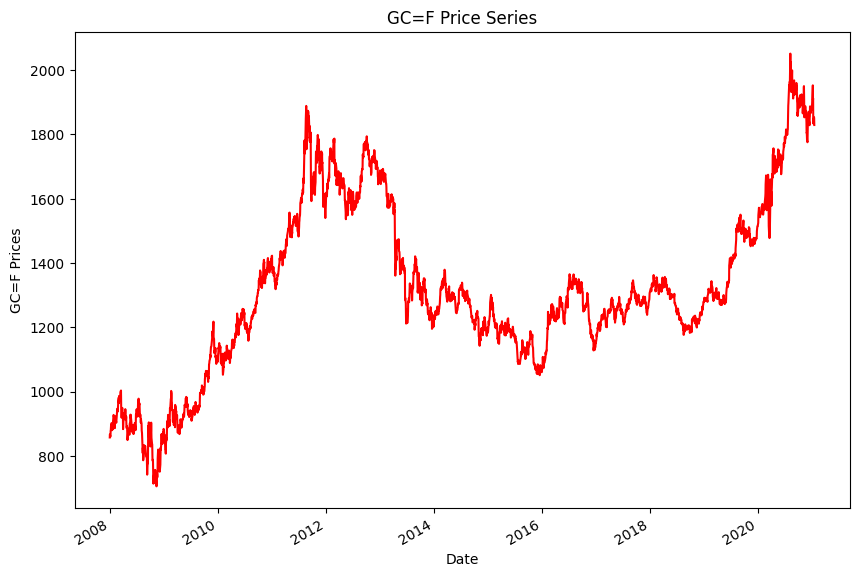

In [17]:
data.Close.plot(figsize = (10,7), color = 'r') #Close is the target variable
plt.ylabel("{} Prices" .format(stocks)) # {} are used in conjunction with format(). in this case, {} is replaced with the contents of the variable stocks
plt.title("{} Price Series" .format(stocks))
plt.show()

/var/folders/27/6f8_b2s93672292qfv64h18h0000gn/T/ipykernel_950/2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<AxesSubplot: xlabel='Close', ylabel='Density'>

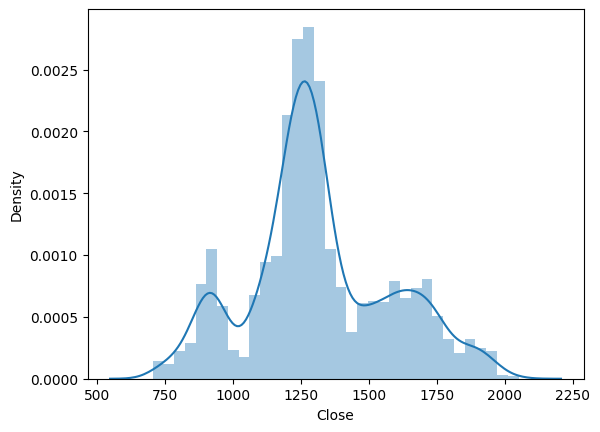

In [18]:
sns.distplot(data["Close"]) #plotting the column "Close"

/var/folders/27/6f8_b2s93672292qfv64h18h0000gn/T/ipykernel_950/3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<AxesSubplot: xlabel='Open', ylabel='Density'>

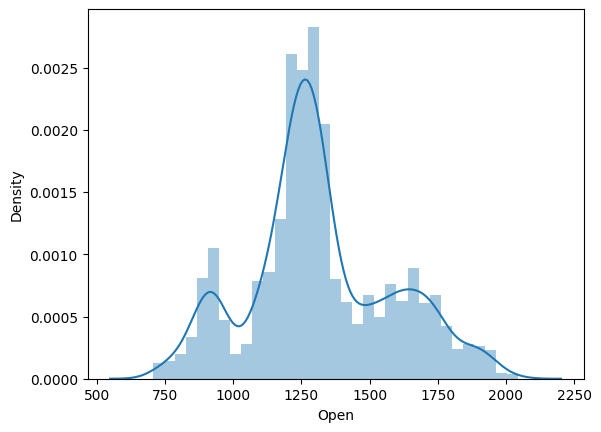

In [20]:
sns.distplot(data["Open"])

In [22]:
x = data.drop("Close", axis = 1) #dropping Close from the x variable
y = data["Close"] #assigning y to the Close variable

from sklearn.model_selection import train_test_split #importing test/train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #assigning the data

#outputing the data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2624, 4)
(657, 4)
(2624,)
(657,)


In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train) #fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a .predict() method call.
pred1 = lr.predict(x_test) #.predict() function enables the prediction of the labels of the data values

In [24]:
pred1

array([1729.403858  , 1084.16216965, 1268.19696234, 1107.60214208,
       1363.92206279,  902.38354996, 1247.65551237, 1287.92027955,
       1208.40577078, 1902.49597207, 1153.19432398, 1946.34793786,
       1575.54863898, 1219.13543342,  955.61801284, 1719.02138421,
       1372.17522077, 1320.15998277,  935.38437585, 1331.51948224,
       1313.06078563, 1325.52847556, 1156.14406558, 1063.10704374,
       1214.94354412, 1649.74996966, 1198.52526174, 1888.91001257,
       1648.29309772, 1285.75848039, 1397.46720727, 1277.20063228,
        867.33410365, 1610.63042607, 1343.04773268, 1346.85553084,
       1307.02595286, 1071.02561811, 1228.97435669, 1164.5305458 ,
       1368.1378064 , 1182.62892173, 1285.80130391, 1489.92350262,
       1266.40870641, 1295.29416968, 1225.49620593, 1179.09757418,
       1824.62377969, 1261.46267691, 1377.34497574, 1351.76951787,
       1327.91471954, 1661.33117039, 1644.59897838, 1306.14496395,
       1107.55421461, 1243.578508  , 1281.50120961,  897.89284

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

#y_test = ground truth (actual value)
#y_pred = model prediction
def calculate_metrics(y_test, y_pred): 
    mse = mean_squared_error(y_test, y_pred) #calculating the mse using y_test and y_pred
    rmse = np.sqrt(mse) #rmse isnt a built in function. You have to manually square root mse
    r2_scores = r2_score(y_test, y_pred) #regression score function

    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2_score: ", r2_score)

calculate_metrics(y_test, pred1)

MSE:  27.472312298997597
RMSE:  5.2414036573228735
R2_score:  <function r2_score at 0x13a1c85e0>


In [28]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso().fit(x_train, y_train)
ridge = Ridge().fit(x_train, y_train)

lassoPred = lasso.predict(x_test) #x_test is used becuase x is the model predicted value
ridgePred = ridge.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.847e+04, tolerance: 1.826e+04
  model = cd_fast.enet_coordinate_descent(


In [29]:
calculate_metrics(y_test, lassoPred) #y_test doesnt get passed through the predict() method as it is the output value

MSE:  46.190175348279055
RMSE:  6.796335435238541
R2_score:  <function r2_score at 0x13a1c85e0>


In [30]:
calculate_metrics(y_test, ridgePred)

MSE:  27.472342705437086
RMSE:  5.241406557922891
R2_score:  <function r2_score at 0x13a1c85e0>


In [32]:
from sklearn.svm import NuSVR
# GridSearchCVruns through all the different parameters that is fed into the parameter grid 
# and produces the best combination of parameters based on a scoring metric of your choice
from sklearn.model_selection import GridSearchCV

svr = NuSVR() #support vector regression

#dictionary that contains all of the parameters that GridSearchCV will try before outputting the best combinations
paramGrid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.0001],
    'kernel': ['rbf']}

grid = GridSearchCV(NuSVR(), paramGrid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.021 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.017 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.021 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.017 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=NuSVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [33]:
svr = NuSVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [38]:
import joblib #pipelining

joblib.dump(ridge, 'model.pkl') #puts data into file
ridge_from_joblib = model = joblib.load('model.pkl')

